## Bank Note Authentication

**Nazmus Sakib Sumon**

**Data set**

This data set is collected from UCI Machine Learning Repository. 

Dataset Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

**Data Set Information**

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

**Attribute Information**

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

**Objective**

**The objective is to classify whether bank note is real or fake. We will use Machine learning classification algorithms.**

We will use 5 classifers:
1. K Nearest Neighbors
2. Decision Tree
3. Random Forest
4. Naive Bayes
5. Logistic Regression

For the accuracy calcualtion, we will use **confusion matrix** and **ROC Curve** for each classifier.

## Importing Libraries

In [1]:
# Libraries needed for reading the data
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Libraries needed for performing Models
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Importing the Dataset

In [2]:
header = ['Variance','Skewness','Curtosis','Entropy','Class']
note_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt', names=header)

## Exploratory Analysis

In this section we will do descriptive analysis. We will look at the data sets. We will use scatter plots between two variables to see if there is any relationships. For the same purpose we will also use box plots.

In [3]:
note_data.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [4]:
# Null value Checking
note_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


There is no null values in this data set. All the columns have 1372 rows

In [5]:
note_data.describe()

,Variance,Skewness,Curtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


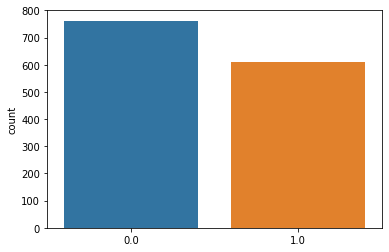

In [6]:
sns.countplot(note_data.values[:,-1])

About 750 (56%) bank notes are identified as 0 or in other words, these are not real.

## Visual Representation of the Data

Plotting ***scatter plots*** to understand the extent of correlation among the features

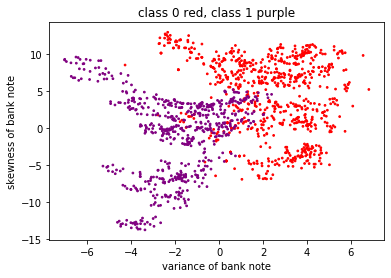

In [7]:
# assign different colors to each feature
colors = {0: "red", 1: "purple"}
variance = note_data[['Variance']]
skewness = note_data[['Skewness']]
curtosis = note_data[['Curtosis']] 
entropy = note_data[['Entropy']]
cl = note_data[['Class']].values

#Variance and skewness
plt.scatter(variance,skewness, c = [colors[cl[0]] for cl in cl],s=3)
plt.title("class 0 red, class 1 purple")
plt.xlabel("variance of bank note")
plt.ylabel("skewness of bank note")
plt.rcParams['axes.facecolor'] = 'white'

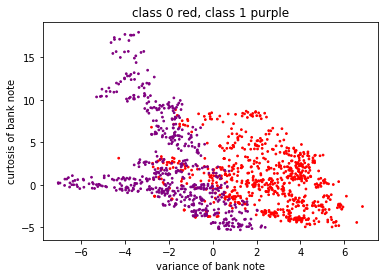

In [8]:
#Variance and curtosis
plt.scatter(variance,curtosis, c = [colors[cl[0]] for cl in cl],s=3)
plt.title("class 0 red, class 1 purple")
plt.xlabel("variance of bank note")
plt.ylabel("curtosis of bank note")
plt.rcParams['axes.facecolor'] = 'white'

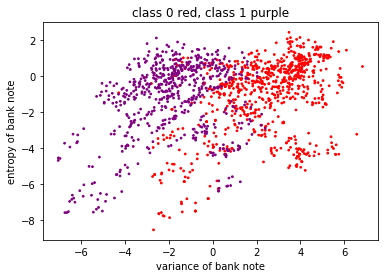

In [9]:
#Variance and entropy
plt.scatter(variance,entropy, c = [colors[cl[0]] for cl in cl],s=3)
plt.title("class 0 red, class 1 purple")
plt.xlabel("variance of bank note")
plt.ylabel("entropy of bank note")
plt.rcParams['axes.facecolor'] = 'white'

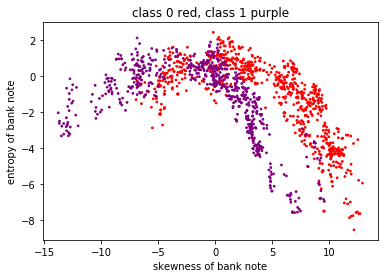

In [10]:
#Skewness and entropy
plt.scatter(skewness,entropy, c = [colors[cl[0]] for cl in cl],s=3)
plt.title("class 0 red, class 1 purple")
plt.xlabel("skewness of bank note")
plt.ylabel("entropy of bank note")
plt.rcParams['axes.facecolor'] = 'white'

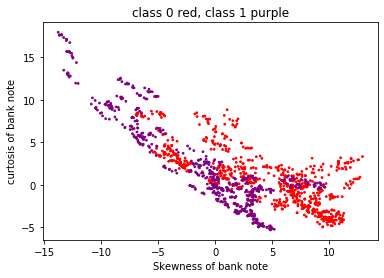

In [11]:
#Skewness and curtosis
plt.scatter(skewness,curtosis, c = [colors[cl[0]] for cl in cl],s=3)
plt.title("class 0 red, class 1 purple")
plt.xlabel("Skewness of bank note")
plt.ylabel("curtosis of bank note")
plt.rcParams['axes.facecolor'] = 'white'

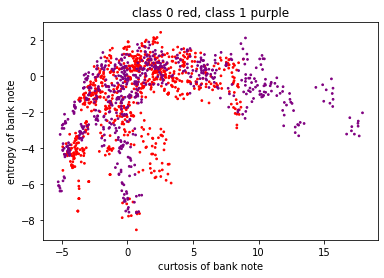

In [12]:
#curtosis and entropy
plt.scatter(curtosis,entropy, c = [colors[cl[0]] for cl in cl],s=3)
plt.title("class 0 red, class 1 purple")
plt.xlabel("curtosis of bank note")
plt.ylabel("entropy of bank note")
plt.rcParams['axes.facecolor'] = 'white'

**Results**

Here, class is dependent variable(y) and all other variables are used as independent variable(x). It is clear that the data is separable and can be classified. That means, variance, skewness, curtosis, and entropy can determine whether the bank note is fake or real.

**Box Plots**

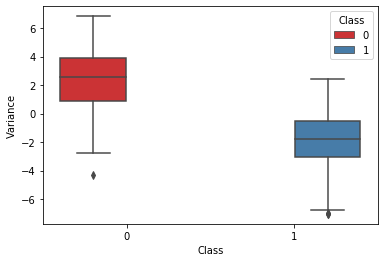

In [13]:
#Variance and Class
bp = sns.boxplot(x= 'Class',y = 'Variance',hue = 'Class', data = note_data, palette = 'Set1')

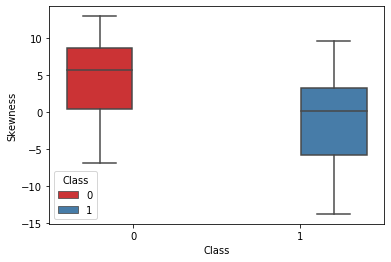

In [14]:
#Skewness and Class
bp = sns.boxplot(x= 'Class',y = 'Skewness',hue = 'Class', data = note_data, palette = 'Set1')

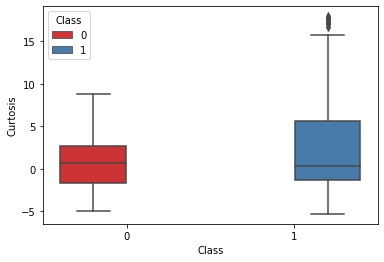

In [15]:
#Curtosis and Class
bp = sns.boxplot(x= 'Class',y = 'Curtosis',hue = 'Class', data = note_data, palette = 'Set1')

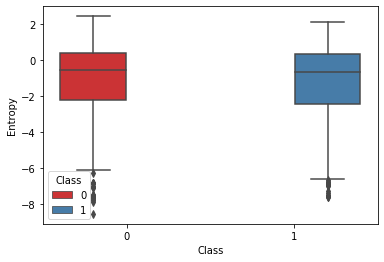

In [16]:
#Entropy and Class
bp = sns.boxplot(x= 'Class',y = 'Entropy',hue = 'Class', data = note_data, palette = 'Set1')

From the above box and whiskers plot, most of the bos plots are simillar, so it is inconclusive. But, the entropy graph looks different, becasue of its higher median, higher inerquartile range, and a higher number of outliers.

## Classification Models 

**In this section, I will apply some classification algorithms. The data set will be divided into train and test set. The data set will also be standardized.**

In [17]:
X = note_data.values[:,:-1]
y = note_data.values[:,-1]

**Scaling the data**

Range of data for different column may impact the calculation. We will standardize the data set to avoid this error.

In [18]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

**Train Test Split**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 20)

## K Nearest Neighbors

In [20]:
# Lets try number of neighobrs as 2
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('The training accuracy for K = 2 is {}'.format(accuracy_score(y_train, knn.predict(X_train))))
print("The testing accuracy for K=2 is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for K = 2 is 1.0
The testing accuracy for K=2 is 1.0


## Determining best number of neighbors for KNN

In [21]:
scores = []
k_range = range(1,15)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

In [22]:
for i, s in enumerate(scores):
    print(i+1, s)

1 1.0
2 1.0
3 1.0
4 1.0
5 1.0
6 1.0
7 1.0
8 1.0
9 1.0
10 1.0
11 0.994535519125683
12 0.994535519125683
13 0.9908925318761385
14 0.9908925318761385


Text(0, 0.5, 'Testing Accuracy')

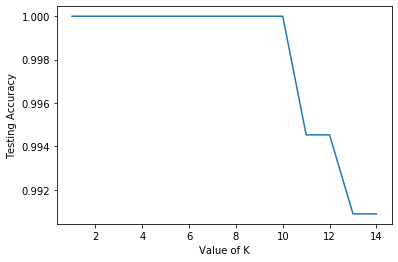

In [23]:
plt.plot(k_range, scores)
plt.xlabel('Value of K')
plt.ylabel ('Testing Accuracy')

From above plot, we can find the best number in the range of 2 to 9. We will try n = 4.

## Fitting model best value of neighbors

In [24]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('The training accuracy for K = 4 is {}'.format(accuracy_score(y_train, knn.predict(X_train))))
print("The testing accuracy for K= 4 is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for K = 4 is 1.0
The testing accuracy for K= 4 is 1.0


**Confusiion Matrix**

In [25]:
confusion_matrix(y_test, y_pred)

array([[311,   0],
       [  0, 238]], dtype=int64)

**ROC curve**

In [26]:
threshold = 0.4
scores = knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, scores, pos_label =1)
print(fpr, tpr)

[0. 0. 1.] [0. 1. 1.]


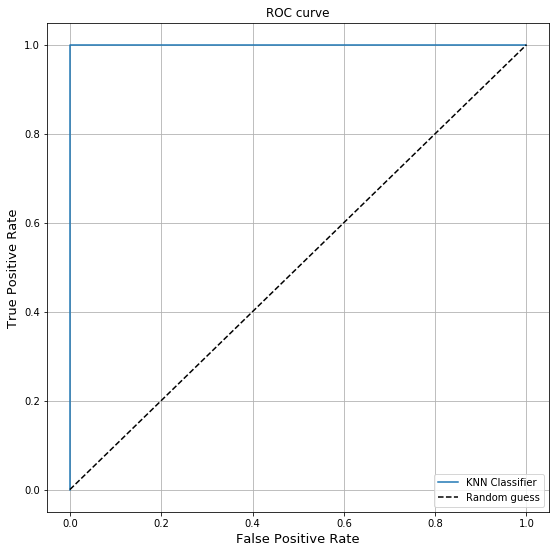

In [27]:
plt.figure(figsize = (9,9))
plt.plot(fpr,tpr, label = 'KNN Classifier')
plt.title('ROC curve', size = 12)
plt.xlabel('False Positive Rate', size  = 13)
plt.ylabel('True Positive Rate', size =13)
plt.plot((0, max(tpr)),'k--',label = 'Random guess')
plt.grid()
plt.legend();

**From the above plot, you can see blue line which touches the margin tells us our model is good.

## Decision Tree Classifier

In [28]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

**Accuracy Scores**

In [29]:
print('The training accuracy for DecisionTreeClassifier is {}'.format(accuracy_score(y_train, clf.predict(X_train))))
print("The testing accuracy for DecisionTreeClassifier  is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for DecisionTreeClassifier is 1.0
The testing accuracy for DecisionTreeClassifier  is 0.9854280510018215


In [30]:
cross_val_score(clf, X, y, cv = 10, scoring = 'accuracy').mean()

0.984687400825135

**Confusion matrix**

In [31]:
confusion_matrix(y_test, y_pred)

array([[307,   4],
       [  4, 234]], dtype=int64)

**ROC Curve**

In [32]:
threshold = 0.4
scores = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, scores, pos_label =1)
print(fpr, tpr)

[0.         0.01286174 1.        ] [0.         0.98319328 1.        ]


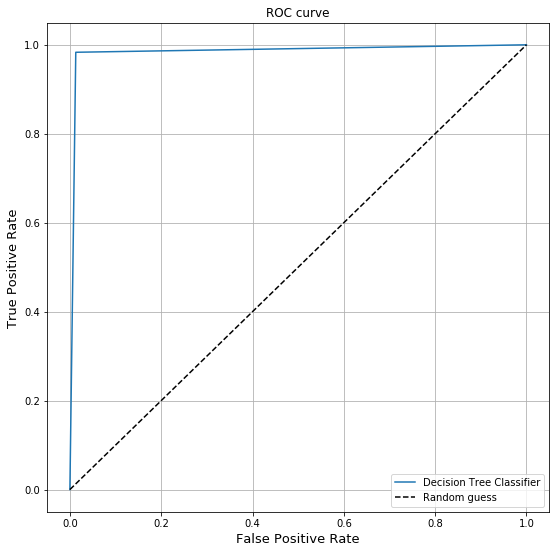

In [33]:
plt.figure(figsize = (9,9))
plt.plot(fpr,tpr, label = 'Decision Tree Classifier')
plt.title('ROC curve', size = 12)
plt.xlabel('False Positive Rate', size  = 13)
plt.ylabel('True Positive Rate', size =13)
plt.plot((0, max(tpr)),'k--',label = 'Random guess')
plt.grid()
plt.legend();

## Random Forrest Classifier

In [34]:
rf = RandomForestClassifier(n_estimators = 10000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [35]:
print('The training accuracy for RandomForesteClassifier is {}'.format(accuracy_score(y_train, rf.predict(X_train))))
print("The testing accuracy for RandomForesteClassifier  is {}".format(accuracy_score(y_test,y_pred)))

The training accuracy for RandomForesteClassifier is 1.0
The testing accuracy for RandomForesteClassifier  is 0.9981785063752276


**Using GridSearchCV to find the best RandomForestClassifier**

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [1, 2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [100, 500],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestClassifier(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='accuracy')
rf_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   53.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=No...
                                              random_state=None, verbose=0,
                                   

**Fitting the model with best parameters obtained by GridSearchCV on RandomForestClassifier**

In [38]:
print('best parameters:', rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_
best_rf_model.fit(X_train, y_train)

best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 1}


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

**Accuracy for RandomForestClassifier**

In [39]:
print('Random Forest Testing Accuracy Score: {}'.format(best_rf_model.score(X_test, y_test)))

Random Forest Testing Accuracy Score: 0.9981785063752276


**Confusion Matrix**

In [40]:
y_pred = best_rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[310,   1],
       [  0, 238]], dtype=int64)

**ROC Curve**

In [41]:
threshold = 0.4
scores = best_rf_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, scores, pos_label =1)
print(fpr, tpr)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.02250804 0.02893891 0.03215434 0.05787781 0.06752412
 0.07395498 0.08681672 0.09646302 0.12540193 0.18649518 0.26688103
 0.39228296 1.        ] [0.         0.41176471 0.57563025 0.68067227 0.75210084 0.80252101
 0.83613445 0.84453782 0.86554622 0.87815126 0.88655462 0.90336134
 0.93277311 0.94117647 0.95378151 0.97058824 0.97478992 0.98319328
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


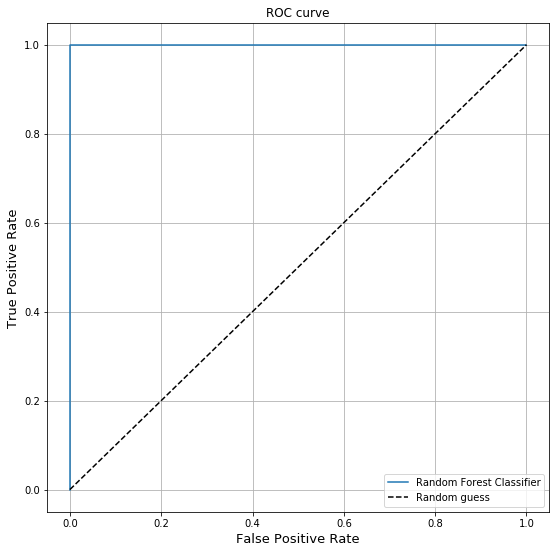

In [42]:
plt.figure(figsize = (9,9))
plt.plot(fpr,tpr, label = 'Random Forest Classifier')
plt.title('ROC curve', size = 12)
plt.xlabel('False Positive Rate', size  = 13)
plt.ylabel('True Positive Rate', size =13)
plt.plot((0, max(tpr)),'k--',label = 'Random guess')
plt.grid()
plt.legend();

## Naive Bayes Classifier

In [43]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB

**Bernoulli Naive Bayes**

In [44]:
sk_bb = BernoulliNB()
sk_bb.fit(X_train, y_train)
acc = cross_val_score(sk_bb, X, y, cv = 10, scoring = 'accuracy')
print('Bernoulli Accuracy:', np.mean(acc))

Bernoulli Accuracy: 0.8440071934835502


**Confusion Matrix**

In [45]:
y_pred = sk_bb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[277,  34],
       [ 43, 195]], dtype=int64)

**ROC Curve**

In [46]:
threshold = 0.4
scores = sk_bb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, scores, pos_label =1)
print(fpr, tpr)

[0.         0.         0.         0.         0.00643087 0.05144695
 0.05144695 0.09967846 0.10932476 0.10932476 0.22508039 0.33762058
 0.7073955  0.75562701 0.8585209  1.        ] [0.         0.01260504 0.02941176 0.18487395 0.42857143 0.70588235
 0.71008403 0.80672269 0.81932773 0.82773109 0.82773109 0.84453782
 0.95378151 1.         1.         1.        ]


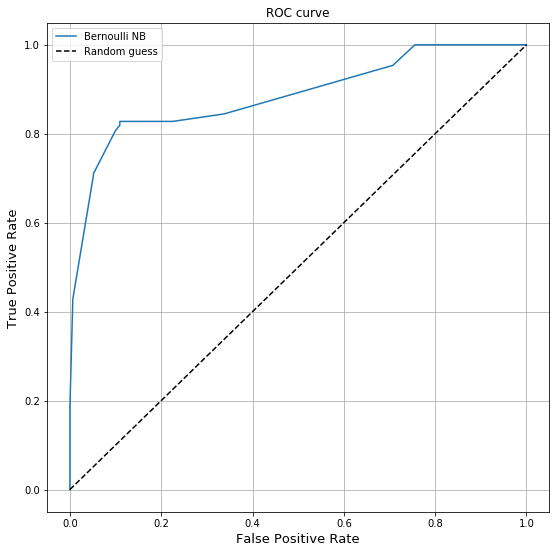

In [47]:
plt.figure(figsize = (9,9))
plt.plot(fpr,tpr, label = 'Bernoulli NB')
plt.title('ROC curve', size = 12)
plt.xlabel('False Positive Rate', size  = 13)
plt.ylabel('True Positive Rate', size =13)
plt.plot((0, max(tpr)),'k--',label = 'Random guess')
plt.grid()
plt.legend();

## Logistic Regression

To perform a logistic regression, we need to:
    - Create a Logistic Regression object log_reg and fit the training data.
    -Measure the accuracy of the classidier by using the log_reg predict function to predict labels yhat and measure the fraction of time that the predictions match the true labels.
    - Perform KFold cross validation with 10 folds.

In [48]:
# Model Creation
logreg = linear_model.LogisticRegression(C = 1e5)
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [49]:
print('Accuracy of the training data is {}'.format(accuracy_score(y_train,logreg.predict(X_train))))
print('Accuracy of the testing data is {}'.format(accuracy_score(y_test,y_pred)))

Accuracy of the training data is 0.9927095990279465
Accuracy of the testing data is 0.9872495446265938


**Confusion matrix**

In [50]:
confusion_matrix(y_test, y_pred)

array([[305,   6],
       [  1, 237]], dtype=int64)

**ROC Curve**

In [51]:
threshold = 0.4
scores = logreg.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, scores, pos_label =1)
print(fpr, tpr)

[0.         0.         0.         0.00321543 0.0096463  0.0096463
 0.0192926  0.0192926  0.03215434 0.03858521 0.03858521 0.04501608
 0.04823151 0.05466238 1.        ] [0.         0.00420168 0.97478992 0.97478992 0.97478992 0.99159664
 0.99159664 0.99579832 0.99579832 0.99579832 1.         1.
 1.         1.         1.        ]


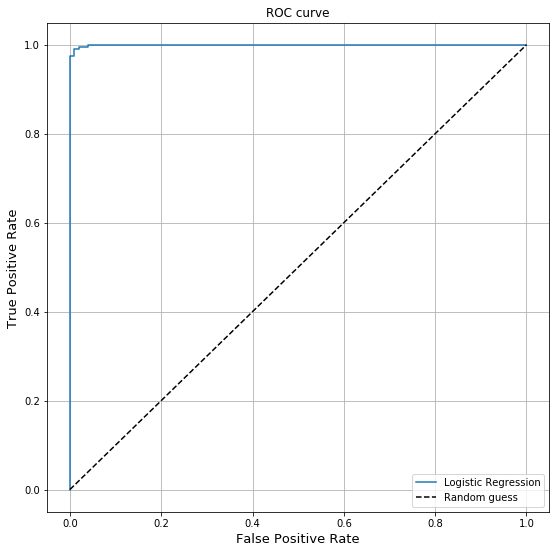

In [52]:
plt.figure(figsize = (9,9))
plt.plot(fpr,tpr, label = 'Logistic Regression')
plt.title('ROC curve', size = 12)
plt.xlabel('False Positive Rate', size  = 13)
plt.ylabel('True Positive Rate', size =13)
plt.plot((0, max(tpr)),'k--',label = 'Random guess')
plt.grid()
plt.legend();

## Conclusion

Lets examine the accuracy rate for each classifier:

K Nearest Neighbors = 1

Decision Tree = 0.9854280510018215

Random Forest = 0.9981785063752276

Naive Bayes = 0.8440071934835502

Logistic Regression = 0.9872495446265938

## Comment

I am a little bit confused, why the accuracy for KNearest Neighbor is 1. Further research is needed. Overall, Random Forrest, Logistic Regression and Decision Tres were very accurate (greater than 98%)